In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Gj = nx.karate_club_graph()

In [3]:
edges = list(Gj.edges())

In [4]:
n = len(Gj.nodes())

print("Population : ", n)

Population :  34


In [5]:
graph = []
for i in range(0,n):
  li = [0]*n 
  graph.append(li)

In [6]:
for x in edges:
  u = x[0]
  v = x[1]
  graph[u][v] = 1
  graph[v][u] = 1

In [7]:
for i in range(0,n):
  print(graph[i])

[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

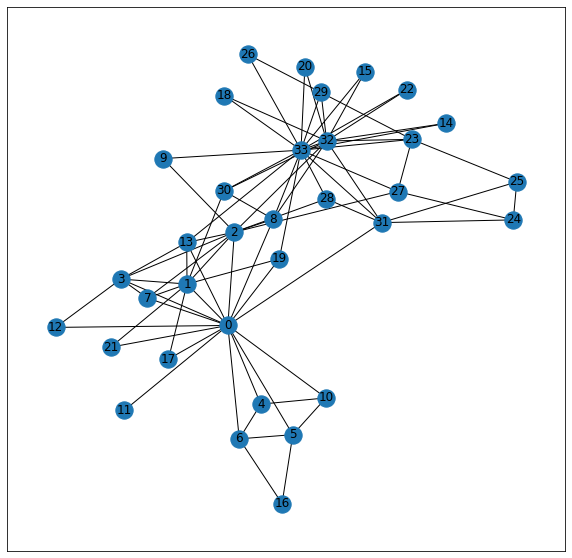

In [8]:
# plot of Karate network
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
nx.draw_networkx(Gj,with_labels = True)

In [9]:
#degrees of all nodes
k = []
for i in range(0,n):
  k.append(sum(graph[i]))

In [10]:
print(k)

[16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17]


In [11]:
#finding total number of edges
m = sum(k)
m = m/2
m

78.0

In [ ]:
#function s
# def s(i,j):
#   if i==j:
#     return 1
#   return 0

In [13]:
#number of clans
# enter 2
num_of_clan = 2


In [14]:
#size of clan
#size of clan = 17
size_of_clan = 17

In [15]:
clans = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
         [0,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]

In [16]:
from random import randint
color = []
for i in range(num_of_clan):
  t = '#%06X' % randint(0, 0xFFFFFF)
  if t not in color:
    color.append(t)

In [17]:
color

['#B95532', '#299CEB']

In [18]:
#colored graph 
colors = [' ']*n
for i in range(0,num_of_clan):
  for j in range(0,len(clans[i])):
    colors[clans[i][j]] = color[i]

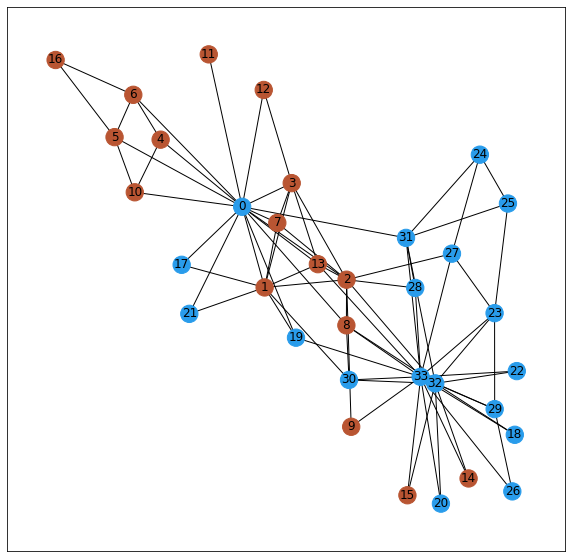

In [19]:
plt.figure(figsize=(10,10))
nx.draw_networkx(Gj,with_labels = True,node_color=colors)

In [20]:
#creating clans value for each node
clan_val = [-1]*n 
for i in range(0,num_of_clan):
  for j in range(0,len(clans[i])):
    clan_val[clans[i][j]] = i 

In [21]:
#defing modularity function 
def modularity(node):
  clan_value = clan_val[node]
  ans = 0 
  for i in range(0,len(clans[clan_value])):
    if i!=node:
      ans+=(graph[node][i] - ((k[node]*k[i])/(2*m)))
  ans/=(2*m)
  return ans



In [22]:
#finding leaders and finess function.
f_val = [0]*n 
for i in range(0,n):
  f_val[i] = modularity(i)

for i in range(0,n):
  print(f_val[i])


0.03994082840236687
0.006533530571992107
0.016929651545036162
0.020710059171597635
0.009985207100591715
0.007067718606180145
0.007067718606180144
0.013477975016436558
-0.002177843523997369
0.00016436554898093398
0.009985207100591711
0.003246219592373439
0.006574621959237345
0.010642669296515452
-0.006245890861275477
-0.006245890861275477
0.0064102564102564135
0.006245890861275478
-0.006738987508218277
0.002712031558185405
-0.006738987508218277
0.006081525312294544
-0.006738987508218277
-0.01684746877054569
-0.010108481262327421
-0.010108481262327421
-0.006738987508218277
-0.007067718606180145
-0.003698224852071005
-0.013477975016436553
-0.0006574621959237342
-0.013806706114398421
-0.01479289940828402
-0.02523011176857331


In [23]:
#creating learders list which is finding the matriarch individual
leaders = []
for i in range(0,num_of_clan):
  leaders.append([0])

for i in range(0,num_of_clan):
  curr_val = f_val[clans[i][0]]
  curr_ind = clans[i][0]
  for j in range(1,len(clans[i])):
    if curr_val<f_val[clans[i][j]]:
      curr_val = f_val[clans[i][j]]
      curr_ind = clans[i][j]
  leaders[i] = curr_ind

In [24]:
# Node 3 and node 0 have highest fitness value we generated above.
for i in range(0, num_of_clan):
  print(leaders[i])

3
0


In [25]:
#updating node sizes
node_sizes = [500]*n 
for i in leaders:
  node_sizes[i] = 1500

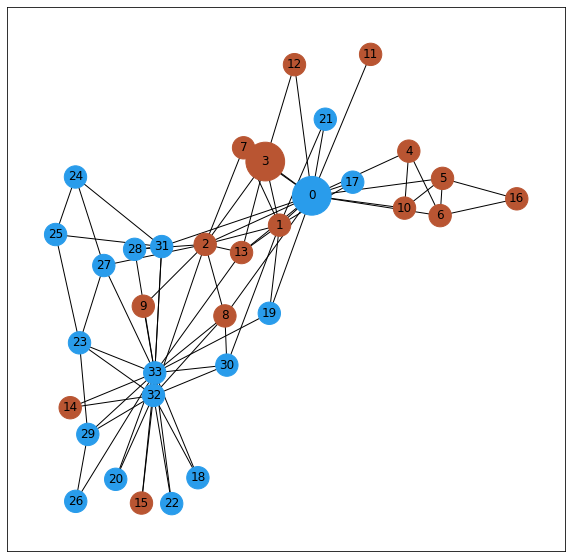

In [26]:
#graph with leaders 
plt.figure(figsize=(10,10))
nx.draw_networkx(Gj,with_labels = True,node_color=colors,node_size=node_sizes)

In [27]:
#algo 1 which is the main algorithm
def ALgo_1(clan_num):
  for i in range(0,num_of_clan):
    for j in range(0,len(clans[i])):
      x = clans[i][j]
      if x!=leaders[i]:
        for k in range(i+1,num_of_clan):
          for clan in range(0,len(clans[k])):
            if clans[k][clan] != leaders[k]:
              clans[i][j] , clans[k][clan] = clans[k][clan],clans[i][j]
              clan_val[clans[i][j]],clan_val[clans[k][clan]] = clan_val[clans[k][clan]],clan_val[clans[i][j]]
              prev = f_val[clans[i][j]]
              curr = modularity(clans[i][j])
              if curr<prev:
                clans[i][j] , clans[k][clan] = clans[k][clan],clans[i][j]
                clan_val[clans[i][j]],clan_val[clans[k][clan]] = clan_val[clans[k][clan]],clan_val[clans[i][j]]
        


In [28]:
for i in range(0,num_of_clan):
  ALgo_1(i)

In [29]:
#Clan after calling of the algorithm
clans

[[18, 17, 3, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 16, 15]]

In [30]:
# #creating clans value for each node
clan_val = [-1]*n 
for i in range(0,num_of_clan):
  for j in range(0,len(clans[i])):
    clan_val[clans[i][j]] = i 

In [31]:
#creating learders list
leaders = []
for i in range(0,num_of_clan):
  leaders.append([0])

for i in range(0,num_of_clan):
  curr_val = f_val[clans[i][0]]
  curr_ind = clans[i][0]
  for j in range(1,len(clans[i])):
    if curr_val<f_val[clans[i][j]]:
      curr_val = f_val[clans[i][j]]
      curr_ind = clans[i][j]
  leaders[i] = curr_ind

In [32]:
leaders

[3, 0]

In [33]:
#updating node sizes
node_sizes = [500]*n 
for i in leaders:
  node_sizes[i] = 1500

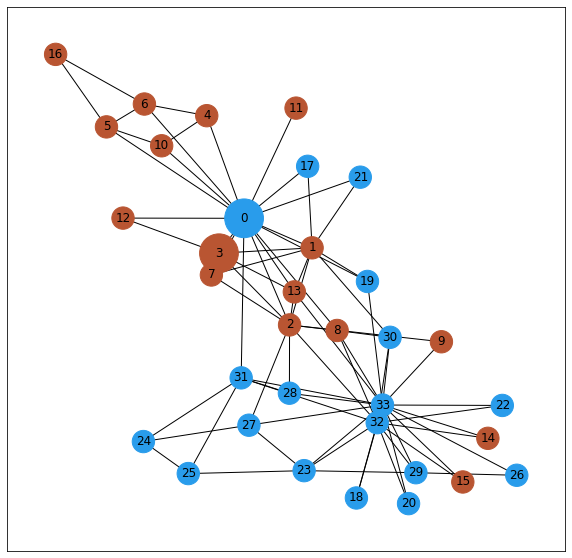

In [35]:
#graph with leaders 
plt.figure(figsize=(10,10))
nx.draw_networkx(Gj,with_labels = True,node_color=colors,node_size=node_sizes)

# Dolphin

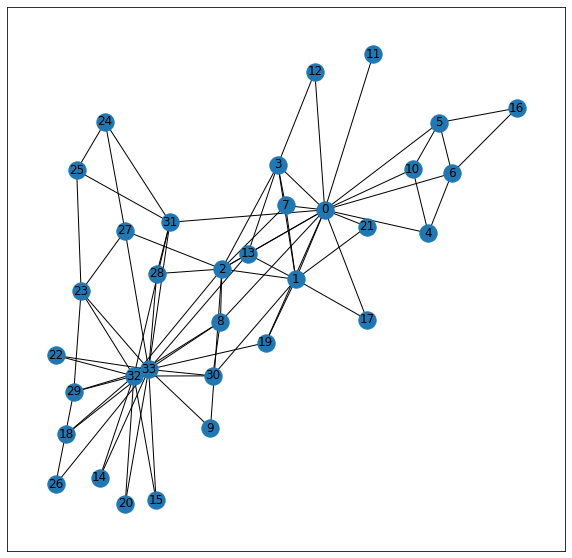

In [37]:
G2 = nx.read_gml ('dolphins.gml', label = 'id')
plt.figure(figsize=(10,10))
nx.draw_networkx(Gj,with_labels = True)

In [38]:
n2 = len(G2.nodes())

print("Population : ", n2)

Population :  62


In [39]:
edges2 = list(G2.edges())

In [40]:
graph2 = []
for i in range(0,n2):
  li = [0]*n2 
  graph2.append(li)

In [41]:
for x in edges2:
  u = x[0]
  v = x[1]
  graph2[u][v] = 1
  graph2[v][u] = 1

In [42]:
for i in range(0,n2):
  print(graph2[i])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0

In [43]:
#degrees of all nodes
k2 = []
for i in range(0,n2):
  k2.append(sum(graph2[i]))

In [44]:
print(k2)

[6, 8, 4, 3, 1, 4, 6, 5, 6, 7, 5, 1, 1, 8, 12, 7, 6, 9, 7, 4, 9, 6, 1, 3, 6, 3, 3, 5, 5, 9, 5, 1, 3, 10, 5, 1, 7, 11, 8, 2, 8, 5, 6, 7, 4, 11, 2, 6, 1, 2, 7, 10, 4, 2, 7, 2, 2, 9, 1, 5, 1, 3]


In [45]:
#finding total number of edges
m2 = sum(k2)
m2 = m2/2
m2

159.0

In [46]:
num_of_clan2 = 2

In [47]:
size_of_clan2 = 31

In [48]:
clans2 = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
         [0,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61]]

In [49]:
from random import randint
color = []
for i in range(num_of_clan2):
  t1 = '#%06X' % randint(0, 0xFFFFFF)
  if t1 not in color:
    color.append(t1)

In [50]:
color

['#940783', '#C0061C']

In [51]:
#colored graph 
colors = [' ']*n2
for i in range(0,num_of_clan2):
  for j in range(0,len(clans2[i])):
    colors[clans2[i][j]] = color[i]

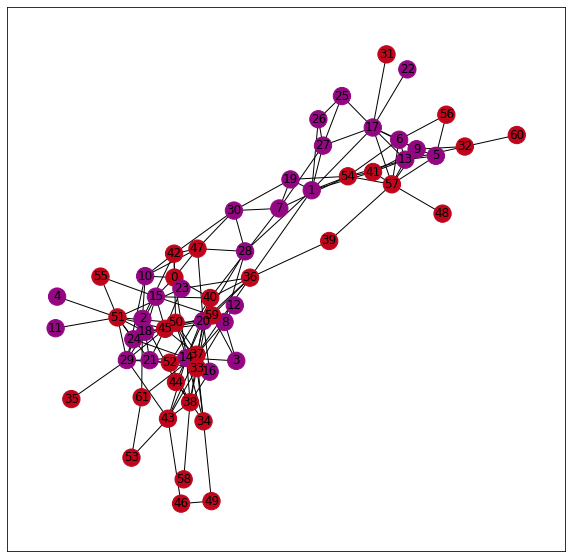

In [52]:
plt.figure(figsize=(10,10))
nx.draw_networkx(G2,with_labels = True,node_color=colors)

In [53]:
#creating clans value for each node
clan_val2 = [-1]*n2 
for i in range(0,num_of_clan2):
  for j in range(0,len(clans2[i])):
    clan_val2[clans2[i][j]] = i 

In [54]:
#defing modularity function 
def modularity2(node):
  clan_value2 = clan_val2[node]
  ans2 = 0 
  for i in range(0,len(clans2[clan_value2])):
    if i!=node:
      ans2+=(graph2[node][i] - ((k2[node]*k2[i])/(2*m2)))
  ans2/=(2*m2)
  return ans2

In [55]:
#finding leaders and finess function.
f_val2 = [0]*n2 
for i in range(0,n2):
  f_val2[i] = modularity2(i)

for i in range(0,n2):
  print(f_val2[i])

-5.933309600094741e-05
0.0036984296507258426
-0.003025987896048415
0.0016316601400261066
-0.001572327044025157
0.00011866619200189994
0.0002966654800047479
-0.0013745500573553273
0.0002966654800047479
0.001987658716031801
0.0017701040306949876
-0.001572327044025157
-0.001572327044025157
0.0005537755626755296
-0.004983980064079741
-0.001156995372018511
-0.0028479886080455667
0.008573632372137178
0.005132312804082116
0.00011866619200189994
-0.0008603298920137649
-0.0028479886080455667
0.0015723270440251573
-0.004657648036074525
0.0034413195680550626
0.00477631422807642
0.004776314228076422
0.008059412206795617
0.001770104030694988
-0.0008603298920137651
0.0015228827973576998
0.001512993948024208
0.0013646612080218347
-0.0038368735413947226
-0.005063090858747677
0.0015031050986907166
-0.0020568806613662422
-0.005478422530754322
-0.00369842965072584
-0.0032830979787191964
-0.0005537755626755245
0.0012262173173529518
0.002729322416043671
-0.00520153474941656
-0.0002768877813377626
0.0039555

In [56]:
#creating learders list which is finding the matriarch individual
leaders2 = []
for i in range(0,num_of_clan2):
  leaders2.append([0])

for i in range(0,num_of_clan2):
  curr_val = f_val2[clans2[i][0]]
  curr_ind = clans2[i][0]
  for j in range(1,len(clans2[i])):
    if curr_val<f_val2[clans2[i][j]]:
      curr_val = f_val2[clans2[i][j]]
      curr_ind = clans2[i][j]
  leaders2[i] = curr_ind

In [57]:
# Node 3 and node 0 have highest fitness value we generated above.
for i in range(0, num_of_clan2):
  print(leaders2[i])

17
47


In [58]:
#updating node sizes
node_sizes = [500]*n2 
for i in leaders2:
  node_sizes[i] = 1500

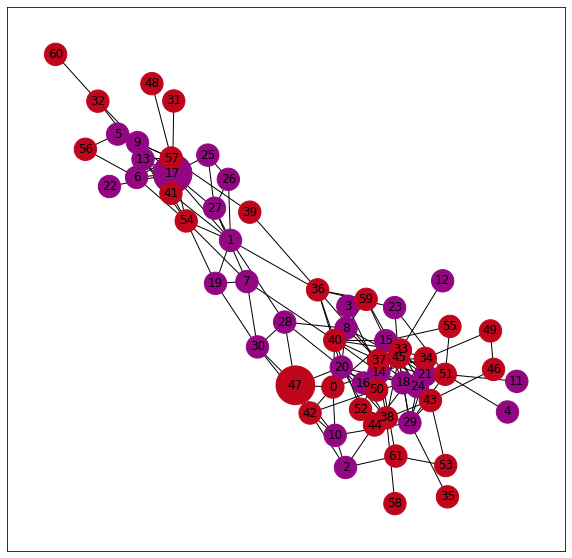

In [59]:
#graph with leaders 
plt.figure(figsize=(10,10))
nx.draw_networkx(G2,with_labels = True,node_color=colors,node_size=node_sizes)

In [60]:
#algo 1 which is the main algorithm
def ALgo_1(clan_num2):
  for i in range(0,num_of_clan2):
    for j in range(0,len(clans2[i])):
      x = clans2[i][j]
      if x!=leaders2[i]:
        for k in range(i+1,num_of_clan2):
          for clan in range(0,len(clans2[k])):
            if clans2[k][clan] != leaders2[k]:
              clans2[i][j] , clans2[k][clan] = clans2[k][clan],clans2[i][j]
              clan_val2[clans2[i][j]],clan_val2[clans2[k][clan]] = clan_val2[clans2[k][clan]],clan_val2[clans2[i][j]]
              prev = f_val2[clans2[i][j]]
              curr = modularity2(clans2[i][j])
              if curr<prev:
                clans2[i][j] , clans2[k][clan] = clans2[k][clan],clans2[i][j]
                clan_val2[clans2[i][j]],clan_val2[clans2[k][clan]] = clan_val2[clans2[k][clan]],clan_val2[clans2[i][j]]

In [61]:
for i in range(0,num_of_clan2):
  ALgo_1(i)

In [62]:
# clans after the algo
for i in range(0,num_of_clan2):
  print(clans2[i])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 42, 44, 45, 46, 48, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 30]


In [63]:
# #creating clans value for each node
clan_val2 = [-1]*n2 
for i in range(0,num_of_clan2):
  for j in range(0,len(clans2[i])):
    clan_val2[clans2[i][j]] = i 

In [64]:
#creating learders list
leaders2 = []
for i in range(0,num_of_clan2):
  leaders2.append([0])

for i in range(0,num_of_clan2):
  curr_val = f_val2[clans2[i][0]]
  curr_ind = clans2[i][0]
  for j in range(1,len(clans2[i])):
    if curr_val<f_val2[clans2[i][j]]:
      curr_val = f_val2[clans2[i][j]]
      curr_ind = clans2[i][j]
  leaders2[i] = curr_ind

In [65]:
leaders2

[17, 47]

In [66]:
#updating node sizes
node_sizes = [500]*n2 
for i in leaders2:
  node_sizes[i] = 1500

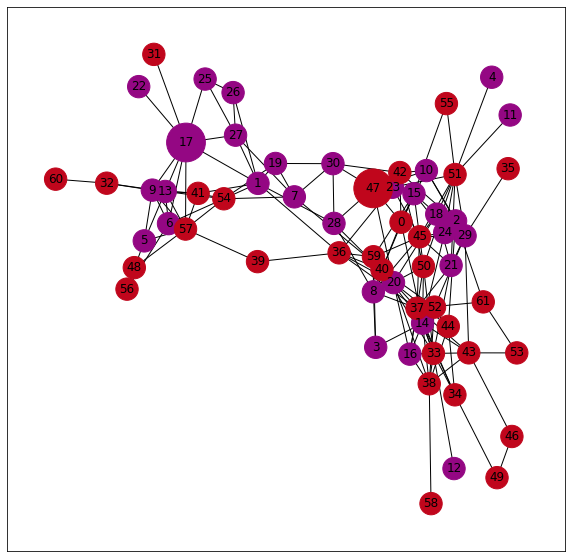

In [67]:
#graph with leaders 
plt.figure(figsize=(10,10))
nx.draw_networkx(G2,with_labels = True,node_color=colors,node_size=node_sizes)

# FootBall

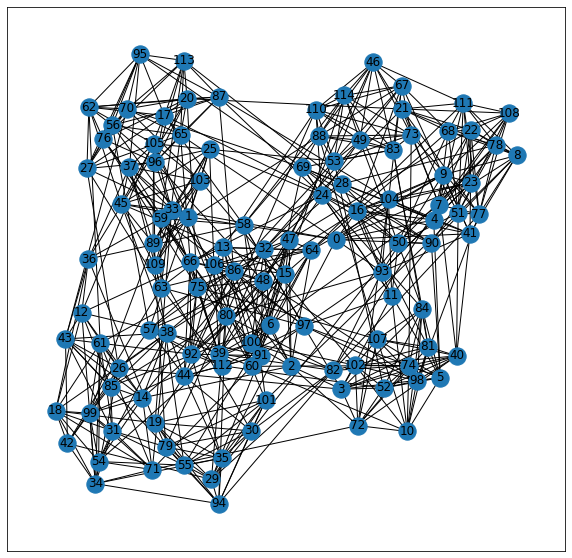

In [68]:
G3 = nx.read_gml ('football.gml', label = 'id')
plt.figure(figsize=(10,10))
nx.draw_networkx(G3,with_labels = True)

In [69]:
n3 = len(G3.nodes())

print("Population : ", n3)

Population :  115


In [70]:
edges3 = list(G3.edges())

In [71]:
graph3 = []
for i in range(0,n3):
  li = [0]*n3 
  graph3.append(li)

In [72]:
for x in edges3:
  u = x[0]
  v = x[1]
  graph3[u][v] = 1
  graph3[v][u] = 1

In [73]:
for i in range(0,n3):
  print(graph3[i])

[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0

In [74]:
#degrees of all nodes
k3 = []
for i in range(0,n3):
  k3.append(sum(graph3[i]))

In [75]:
print(k3)

[12, 12, 12, 12, 11, 12, 12, 12, 11, 11, 10, 10, 10, 11, 10, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 11, 10, 11, 9, 11, 11, 11, 11, 10, 11, 11, 8, 11, 11, 11, 11, 10, 7, 11, 11, 11, 11, 11, 11, 11, 9, 11, 10, 12, 10, 11, 10, 10, 10, 8, 11, 11, 11, 9, 11, 11, 11, 12, 11, 11, 11, 10, 11, 11, 11, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 9, 11, 11, 12, 11, 9, 11, 11, 10, 10, 10, 10, 8, 11, 10, 11, 10, 10, 10, 12, 10, 11, 10, 10, 11, 11, 11, 10, 10, 11]


In [76]:
m3 = sum(k3)
m3 = m3/2
m3

613.0

In [96]:
num_of_clan3 = 12

In [97]:
size_of_clan3 = 9

In [98]:
clans3 = [[0,1,2,3,4,5,6,7,8,9],
         [10,11,12,13,14,15,16,17,18,19],
         [20,21,22,23,24,25,26,27,28],
         [29,30,31,32,33,34,35,36,37,38],
         [39,40,41,42,43,44,45,46,47],
         [50,51,52,53,54,55,56,57,58,59],
         [48,62,63,64,65,66,67,68,69],
         [49,60,61,62,63,70,71,72,73,74],
         [75,76,77,78,79,80,81,82,83],
         [84,85,86,87,88,89,90,91,92,93],
         [94,95,96,97,98,99,100,101,102,103],
         [104,106,107,108,109,110,111,112,113,114]]

In [84]:
# from random import randint
# color3 = []
# for i in range(0,11):
#   t1 = '#%06X' % randint(0, 0xFFFFFF)
#   if t1 not in color3:
#     color3.append(t1)

In [ ]:
# print(color3)

In [86]:
# color = [' ']*200
# for i in range(0,11):
#   for j in range(0,9):
#     color[clans3[i][j]] = color3[i]


In [ ]:
#colored graph 
# colors3 = [' ']*108
# for i in range(0,num_of_clan3):
#   for j in range(0,len(clans3[i])):
#     colors3[clans3[i][j]] = color3[i]

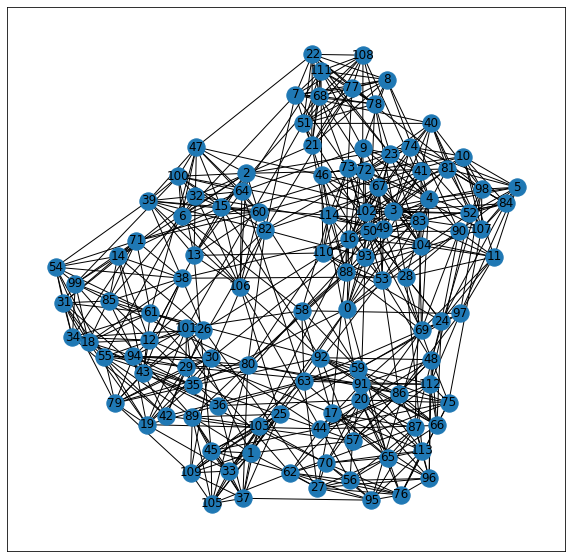

In [99]:
plt.figure(figsize=(10,10))
nx.draw_networkx(G3,with_labels = True)

In [100]:
#creating clans value for each node
clan_val3 = [-1]*n3 
for i in range(0,num_of_clan3):
  for j in range(0,len(clans3[i])):
    clan_val3[clans3[i][j]] = i 

In [101]:
#defing modularity function 
def modularity3(node):
  clan_value3 = clan_val3[node]
  ans = 0 
  for i in range(0,len(clans3[clan_value3])):
    if i!=node:
      ans+=(graph3[node][i] - ((k3[node]*k3[i])/(2*m3)))
  ans/=(2*m3)
  return ans

In [102]:
#finding leaders and finess function.
f_val3 = [0]*n3 
for i in range(0,n3):
  f_val3[i] = modularity3(i)

for i in range(0,n3):
  print(f_val3[i])

0.0016087010902974966
-2.2620280012454562e-05
0.000793040405142521
0.000793040405142521
0.0016712395115084
0.000793040405142521
0.0007930404051425209
0.000793040405142521
0.0008555788263534244
0.0016712395115084
3.7256931785219075e-05
0.0008529176169401947
-0.0007784037533697564
-4.0583443551756645e-05
3.725693178521898e-05
-0.0001184238188887323
0.0015907379267581943
-0.0008562441287067322
-0.0008562441287067322
-0.0008562441287067322
-0.0007757425439565265
0.0008555788263534244
0.0008555788263534244
0.0008555788263534244
-0.0007052204945059332
3.9918141198448936e-05
0.00011044019064904224
3.9918141198448936e-05
0.00018096224009963566
-0.0008562441287067322
-0.0008562441287067322
-0.0008562441287067322
-4.058344355175655e-05
0.000852917616940195
-0.0008562441287067322
-4.0583443551756645e-05
-0.000622723002695805
-4.0583443551756645e-05
-0.0008562441287067322
3.9918141198449024e-05
0.0008555788263534244
0.0017417615609589938
-0.0004936543461541532
-0.0007757425439565265
-0.00077574254

In [103]:
#creating learders list which is finding the matriarch individual
leaders3 = []
for i in range(0,num_of_clan3):
  leaders3.append([0])

for i in range(0,num_of_clan3):
  curr_val = f_val3[clans3[i][0]]
  curr_ind = clans3[i][0]
  for j in range(1,len(clans3[i])):
    if curr_val<f_val3[clans3[i][j]]:
      curr_val = f_val3[clans3[i][j]]
      curr_ind = clans3[i][j]
  leaders3[i] = curr_ind

In [104]:
# Node 3 and node 0 have highest fitness value we generated above.
for i in range(0, num_of_clan3):
  print(leaders3[i])

4
16
21
33
41
52
64
74
77
90
100
108


In [105]:
#updating node sizes
node_sizes = [500]*n3 
for i in leaders3:
  node_sizes[i] = 1500

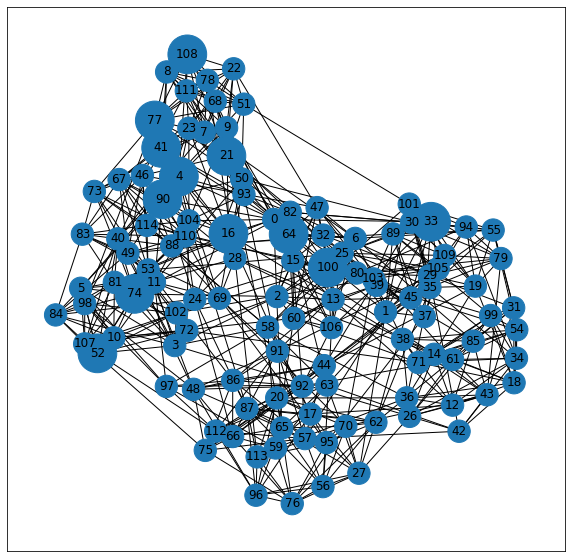

In [106]:
#graph with leaders 
plt.figure(figsize=(10,10))
nx.draw_networkx(G3,with_labels = True,node_size=node_sizes)

In [107]:
#algo 1 which is the main algorithm
def ALgo_1(clan_num3):
  for i in range(0,num_of_clan3):
    for j in range(0,len(clans3[i])):
      x = clans3[i][j]
      if x!=leaders3[i]:
        for k in range(i+1,num_of_clan3):
          for clan in range(0,len(clans3[k])):
            if clans3[k][clan] != leaders3[k]:
              clans3[i][j] , clans3[k][clan] = clans3[k][clan],clans3[i][j]
              clan_val3[clans3[i][j]],clan_val3[clans3[k][clan]] = clan_val3[clans3[k][clan]],clan_val3[clans3[i][j]]
              prev = f_val3[clans3[i][j]]
              curr = modularity3(clans3[i][j])
              if curr<prev:
                clans3[i][j] , clans3[k][clan] = clans3[k][clan],clans3[i][j]
                clan_val3[clans3[i][j]],clan_val3[clans3[k][clan]] = clan_val3[clans3[k][clan]],clan_val3[clans3[i][j]]

In [108]:
for i in range(0,num_of_clan3):
  ALgo_1(i)

In [109]:
for i in range(0, num_of_clan3):
  print(clans3[i])

[8, 0, 1, 2, 4, 3, 5, 6, 7, 9]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[46, 21, 82, 43, 24, 26, 40, 25, 81]
[22, 23, 29, 30, 33, 31, 66, 32, 34, 67]
[35, 36, 41, 37, 38, 50, 80, 51, 53]
[78, 45, 52, 75, 47, 54, 20, 55, 56, 57]
[44, 58, 27, 64, 76, 28, 69, 39, 59]
[65, 42, 62, 63, 49, 60, 61, 62, 63, 74]
[70, 71, 77, 72, 73, 84, 85, 86, 87]
[88, 89, 91, 92, 94, 95, 90, 96, 79, 97]
[98, 99, 101, 102, 103, 107, 100, 111, 109, 106]
[93, 110, 83, 108, 68, 48, 114, 104, 112, 113]


In [110]:
# #creating clans value for each node
clan_val3 = [-1]*n3
for i in range(0,num_of_clan3):
  for j in range(0,len(clans3[i])):
    clan_val3[clans3[i][j]] = i 

In [111]:
#creating learders list
leaders3 = []
for i in range(0,num_of_clan3):
  leaders3.append([0])

for i in range(0,num_of_clan3):
  curr_val = f_val3[clans3[i][0]]
  curr_ind = clans3[i][0]
  for j in range(1,len(clans3[i])):
    if curr_val<f_val3[clans3[i][j]]:
      curr_val = f_val3[clans3[i][j]]
      curr_ind = clans3[i][j]
  leaders3[i] = curr_ind

In [112]:
leaders3

[4, 16, 21, 22, 41, 78, 64, 74, 77, 90, 100, 93]

In [113]:
#updating node sizes
node_sizes = [500]*n3
for i in leaders3:
  node_sizes[i] = 1500

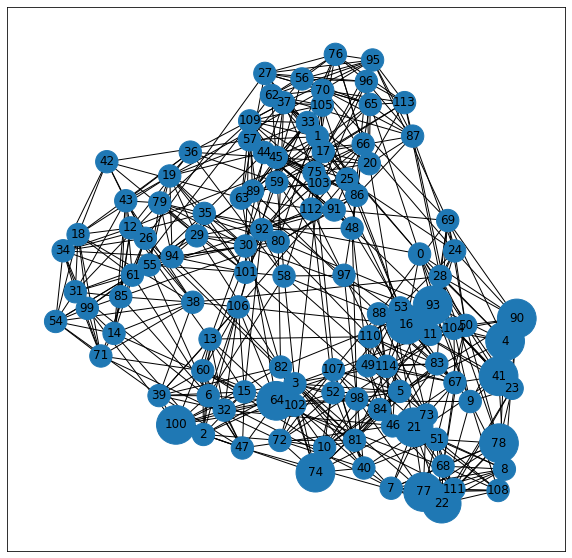

In [114]:
#graph with leaders 
plt.figure(figsize=(10,10))
nx.draw_networkx(G3,with_labels = True,node_size=node_sizes)

In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import math
import networkx as nx
from networkx.generators.community import LFR_benchmark_graph
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm

def delta(u,v):
  return math.mat[u][v]
def Unifiability(Graph, Ci, Cj, mat):
    sum1, sum2, sum3 = 0, 0, 0
    for i in Ci:
        for j in Cj:
            sum1 += int (mat [[i], [j]])
    for i in Ci:
        for j in Graph:
            sum2 += int (mat [[i], [j]])
        for j in Cj:
            sum2 -= int (mat [[i], [j]])
    for i in Cj:
        for j in Graph:
            sum3 += int (mat [[i], [j]])
        for j in Ci:
            sum3 -= int (mat [[i], [j]])
    return sum1 / (sum2 + sum3 - sum1)
def AVU (Graph, cluster, mat):
    sum_Unifiability = 0
    for i in cluster:
        for j in cluster:
            if i != j:
                sum_Unifiability += Unifiability (Graph, i, j, mat)
    return sum_Unifiability / len (cluster)
def isolability (Graph, Ci, mat):
    sum1, sum2 = 0, 0
    for i in Ci:
        for j in Ci:
            sum1 += int (mat [[i], [j]])
    for i in Ci:
        for j in Graph:
            if i != j:
                sum2 += int (mat [[i], [j]])
    return sum1 / (sum1 + sum2)
def AVI (Graph, cluster, mat):
    sum = 0
    for i in cluster:
        sum += isolability (Graph, i, mat)
    return sum / len (cluster)

def AUI (Graph, cluster, mat):
    AVI_G = AVI (Graph, cluster, mat)
    AVU_G = AVU (Graph, cluster, mat)
    return (2 * AVI_G) / (1 + AVU_G * AVI_G)

def ANUI (Graph,cluster,mat):
    return AUI(Graph,cluster,mat)/2

def readGraph (graphName):
    Graph = nx.read_gml (graphName, label = 'id')
    partition = community_louvain.best_partition (Graph)
    pos = nx.spring_layout (Graph)
    cmap = cm.get_cmap ('rainbow', max (partition.values()) + 1)
    mat = nx.to_numpy_matrix (Graph)
    cluster = [[]]
    maxPartitionVal = 0
    for i in partition:
        if partition[i] > maxPartitionVal:
            maxPartitionVal = partition[i]
    for i in range (maxPartitionVal):
        cluster += [[]]
    for i in partition:
        cluster [partition[i]].append (i)
     
    var = 1
    for i in cluster:
        var += 1
     
    AVU_G = AVU (Graph, cluster, mat)
    print ("AVU = ", AVU_G)
    AVI_G = AVI (Graph, cluster, mat)
    print ("AVI = ", AVI_G)
    AUI_G = AUI (Graph, cluster, mat)
    print ("AUI = ", AUI_G)
    ANUI_G = ANUI (Graph, cluster, mat)
    print ("ANUI = ", ANUI_G)
    m=nx_comm.modularity(Graph, nx_comm.label_propagation_communities(Graph))
    print("Extended Modularity = ",m)
    plt.figure (figsize = (15, 15))
    nx.draw_networkx (Graph, with_labels = True, node_size = 100, node_color =
list (partition.values()), cmap = plt.get_cmap ('gist_rainbow'))
    plt.show ()



karate club
AVU =  0.14741413916146298
AVI =  0.41488154348134487
AUI =  0.7819400955168019
ANUI =  0.39097004775840094
Extended Modularity =  0.3251150558842867


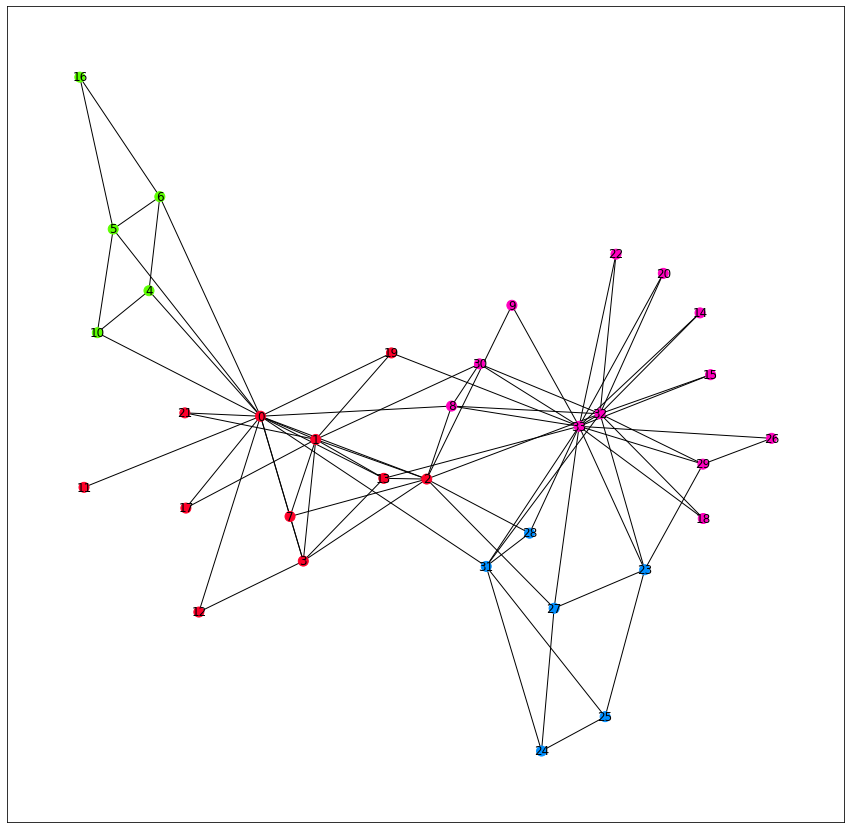

In [117]:
print ('\nkarate club')
# karate_Graph = G1
nx.write_gml (Gj, "karate.gml")
readGraph ("karate.gml")


Dolphin Network
AVU =  0.14488029871979693
AVI =  0.4055903769561894
AUI =  0.7661596390837571
ANUI =  0.38307981954187853
Extended Modularity =  0.49857600569597715


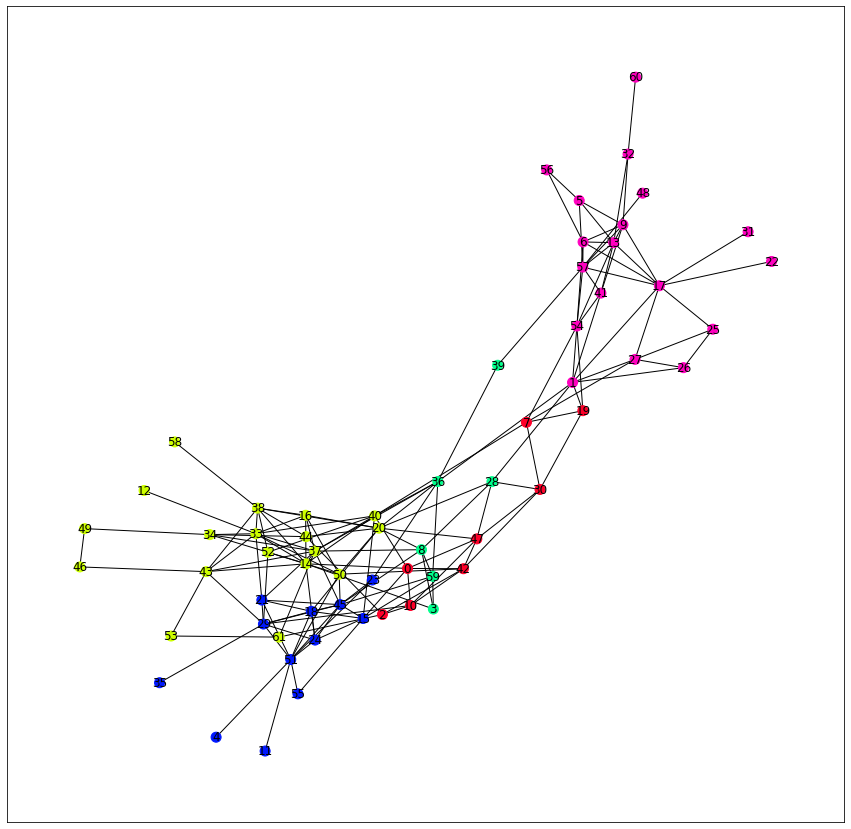

In [118]:
print ('\nDolphin Network')
# karate_Graph = G1
nx.write_gml (G2, "dolphin.gml")
readGraph ("dolphin.gml")

\Football Network
AVU =  0.14746088719740413
AVI =  0.41848204645891546
AUI =  0.7883172455103723
ANUI =  0.39415862275518615
Extended Modularity =  0.5831215454175304


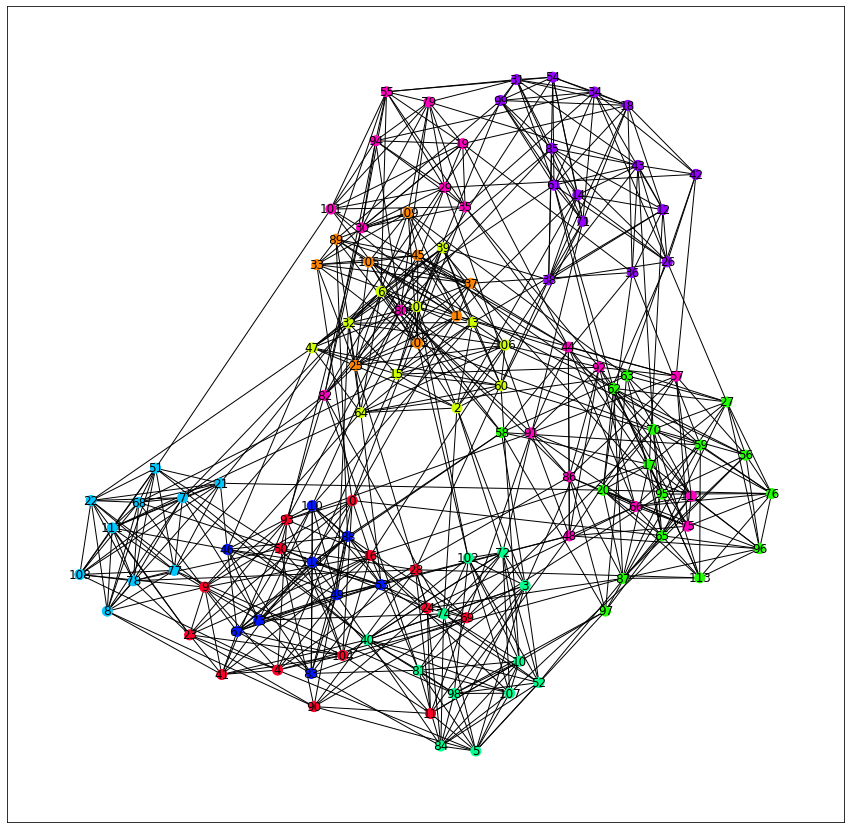

In [120]:
print ('\Football Network')
# karate_Graph = G1
nx.write_gml (G3, "football.gml")
readGraph ("football.gml")